# Σύνοψη της εργασίας

### Ας γνωρίσουμε το dataset που έχουμε 
| **Χαρακτηριστικό**               | **Περιγραφή**                                                                 |
|-----------------------------------|-------------------------------------------------------------------------------|
| Gender                            | Φύλο (άνδρας ή γυναίκα)                                                      |
| CAEC                              | Αν τρώει κάποιο φαγητό ανάμεσα στα κύρια γεύματα                              |
| Age                               | Ηλικία                                                                       |
| SMOKE                             | Αν καπνίζει                                                                  |
| Height                            | Ύψος                                                                         |
| CH2O                              | Πόσο συχνά πίνει νερό                                                        |
| Weight                            | Κιλά                                                                         |
| SCC                               | Παρακολουθεί τις θερμίδες που καταναλώνει καθημερινά                         |
| family_history_with_overweight    | Αν κάποιος στην οικογένεια έχει ιστορικό παχυσαρκίας                         |
| FAF                               | Πόσο συχνά κάνει γυμναστική                                                  |
| FAVC                              | Πόσο συχνά τρώει τροφές υψηλής θερμιδικής αξίας                              |
| TUE                               | Πόσο χρόνο περνάει σε ηλεκτρονικές συσκευές                                  |
| FCVC                              | Αν τρώει συνήθως λαχανικά στα γεύματά του                                     |
| CALC                              | Πόσο συχνά πίνει αλκοόλ                                                      |
| NCP                               | Πόσα κύρια γεύματα τρώει την ημέρα                                           |
| MTRANS                            | Τι μέσο χρησιμοποιεί στην καθημερινότητα                                     |
| NObeyesdad                        | Κατηγορία παχυσαρκίας                                                        |

### Ποία είναι τα βήματα της εργασίας??

# Ανάλυση Βημάτων Εργασίας

## Βήμα 1: Προπαρασκευή Δεδομένων (25%)

**Στόχος:**  
Προετοιμασία του dataset για ανάλυση με:
- Καθαρισμό από ελλείψεις/λάθη
- Κανονικοποίηση & διακριτοποίηση
- Κωδικοποίηση μη-αριθμητικών χαρακτηριστικών
- Μείωση διαστάσεων

**Κρίσιμες Ενέργειες:**  
1. **Εξερεύνηση Δεδομένων**  
   - Αναγνώριση ελλιπών τιμών (`msno.bar()`, `isna().sum()`)
   - Διερεύνηση κατανομών (ιστογράμματα, boxplots)

2. **Καθαρισμός**  
   - Αφαίρεση duplicates
   - Αντιμετώπιση outliers (προσαρμοσμένο IQR ανά feature)

3. **Μετασχηματισμοί**  
   - MinMax/Standard Scaling για συνεχή μεταβλητές
   - One-Hot Encoding-Ordinal Encoding-Label Encoding για κατηγορικά δεδομένα

4. **Συσχετίσεις**  
   - Heatmap συσχετίσεων για feature selection
   - PCA (αν χρειάζεται για μείωση διαστάσεων)



## Βήμα 2: Συσταδοποίηση (20%)

**Στόχος:**  
Ανακάλυψη latent patterns στη διατροφική συμπεριφορά.

**Μέθοδοι:**  
1. **K-Means**  
   - Επιλογή k με elbow method/silhouette score

2. **DBSCAN**  
   - Προσαρμογή ευαισθησίας (eps, min_samples)
   - Ανθεκτικότητα σε μη-σφαιρικές συστάδες

**Αξιολόγηση:**  
- Συγκριτικά metrics (Silhouette, Davies-Bouldin)
- Scatter plots με χρωματισμό κατά cluster
- Χρονική απόδοση (`timeit`)


## Βήμα 3: Ταξινόμηση & Πρόβλεψη (45%)

### (a) Classification (20%)

**Πρόβλεψη:** Obesity Category (NObeyesdad)  
**Μοντέλα:**  
1. Random Forest 
2. Neural Network (MLP)

**Μετρικές:**  
- Accuracy, Precision, Recall, F1
- Confusion Matrix  
- ROC-AUC Curves

### (b) Regression (25%)

**Πρόβλεψη:** BMI (υπολογιζόμενο από Weight/Height²)  
**Μοντέλα:**  
1. Custom FeedForward NN  
   - Τυπική αρχιτεκτονική (2-3 hidden layers)
   - Dropout για regularization

2. Transfer Learning  
   

**Μετρικές:**  
- MAE, MAPE, RMSE  
- Validation Loss Curves  
- Prediction vs Actual Scatterplots



### Διαβάζουμε τα δεδομένα μας 

In [27]:
import pandas as pd
full_dataset = pd.read_csv("../CSV_files/data.csv")
full_dataset = full_dataset.sample(frac=1, random_state=42).reset_index(drop=True)


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

### Βλέπουμε πόσα δεδομένα έχουμε

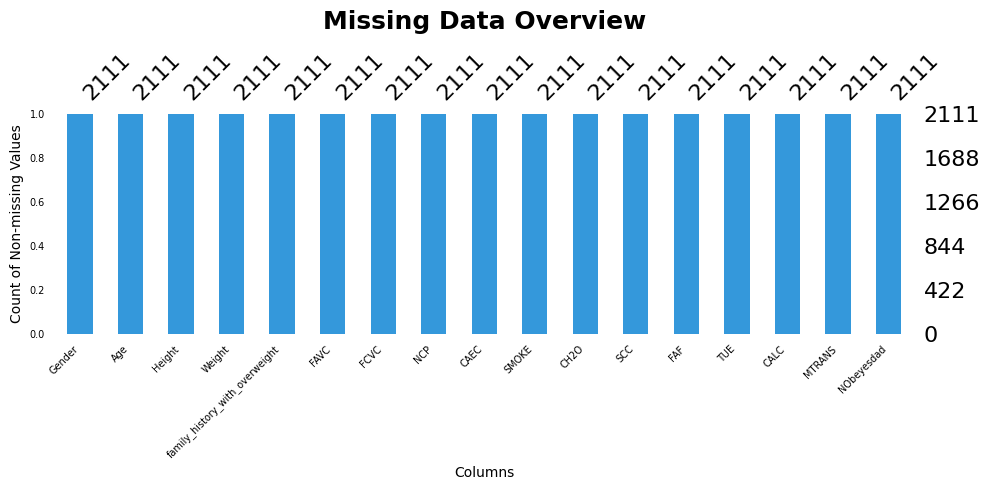

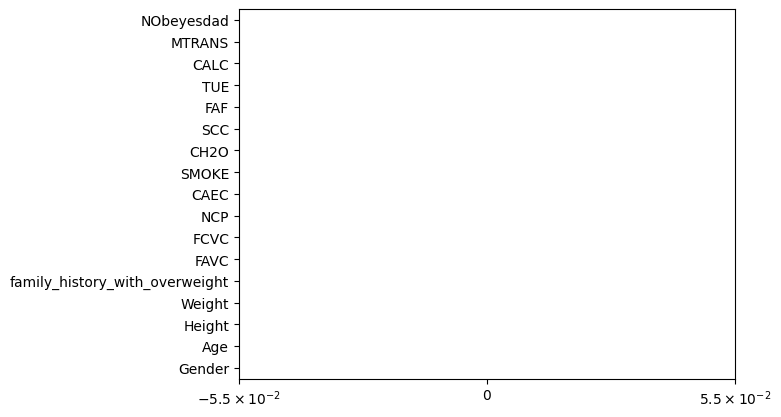

In [29]:
#ΠΡΩΤΑ ΘΑ ΨΑΞΟΥΜΕ ΓΙΑ ΕΛΛΙΠΕΙΣ ΤΙΜΕΣ ΣΤΑ ΔΕΔΟΜΕΝΑ ΜΑΣ 
#ΣΕ ΑΥΤΟ ΤΟ ΣΗΜΕΙΟ ΘΑ ΔΗΜΙΟΥΡΓΗΣΟΥΜΕ ΕΝΑ ΓΡΑΦΗΜΑ ΠΟΥ ΘΑ ΠΡΟΒΑΛΕΙ ΓΙΑ ΚΑΘΕ ΣΤΗΛΗ ΞΕΧΩΡΙΣΤΑ ΤΑ non-null values
fig, ax = plt.subplots(1, 1, figsize=(10, 5))    
msno.bar(full_dataset, ax=ax, color="#3498db")
ax.set_title("Missing Data Overview", fontsize=18, fontweight="bold", pad=15)
ax.set_xlabel("Columns", fontsize=10)        
ax.set_ylabel("Count of Non-missing Values", fontsize=10)
ax.tick_params(axis="both", which="major", labelsize=7) 
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.tight_layout()
plt.show()
#ΣΕ ΑΥΤΟ ΤΟ ΣΗΜΕΙΟ ΘΑ ΔΗΜΙΟΥΡΓΗΣΟΥΜΕ ΕΝΑ ΓΡΑΦΗΜΑ ΠΟΥ ΘΑ ΠΡΟΒΑΛΕΙ ΓΙΑ ΚΑΘΕ ΣΤΗΛΗ ΞΕΧΩΡΙΣΤΑ ΤΑ null values
fig, ax = plt.subplots(1, 1)
full_dataset.isna().sum().plot.barh(ax=ax)
ax.set_xscale("symlog")
plt.show()


#ΑΠΟ ΤΟΝ ΣΥΝΔΙΑΣΜΟ ΤΩΝ ΔΥΟ ΑΥΤΩΝ ΓΡΑΦΗΜΑΤΩΝ ΚΑΤΑΛΙΓΟΥΜΕ ΣΤΑ ΣΥΜΠΕΡΑΣΜΑΤΑ ΠΟΥ ΘΕΛΟΥΜΕ

### Mετά διαγράψαμε τα διπλότυπα όπου εμφανίστηκαν 24 με αυτή την ιδιότητα και συνεπώς πραγματοποιήθηκε διαγραφή τους.Αυτό έχει ως αποτέλεσμα μείωσης του dataset κατά 1,13%(από 2111 εγγραφές στις 2087 εγγραφές).

In [30]:
duplicate_rows = full_dataset.duplicated().sum()
if duplicate_rows>0:
    full_dataset=full_dataset.drop_duplicates()

### Στη συνέχεια είναι απαραίτητο να εντοπιστούν ακραίες τιμές στα δεδομένα και με τη σειρά τους να διαγραφούν με χρήση του IQR με iqr factor διαφορετικό για κάθε χαρακτηριστικό καθώς αυτά διαφέρουν μεταξύ τους - διαγράφηκαν 303 εγγραφές δηλαδή το 14,5% του dataset 

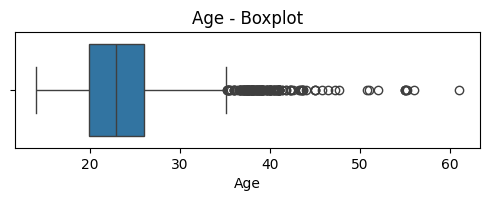

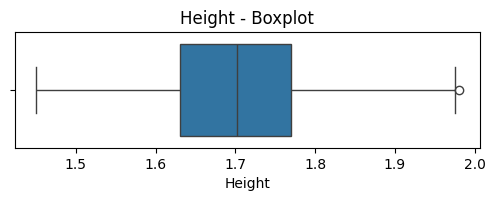

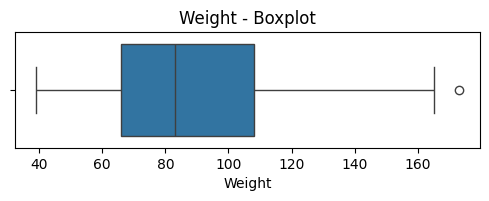

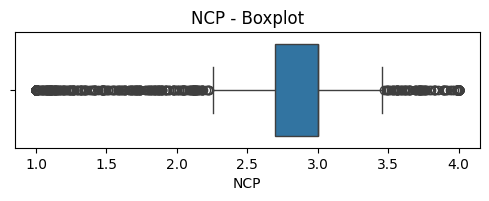

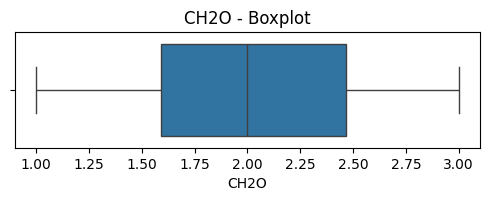

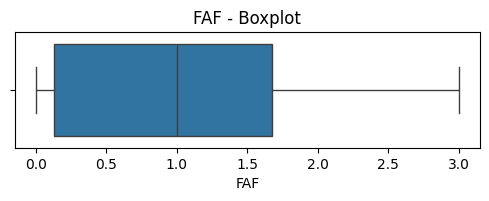

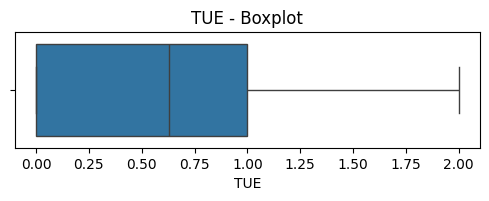

In [31]:
continuous_vars = ['Age', 'Height', 'Weight', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in continuous_vars:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=full_dataset[col])
    plt.title(f"{col} - Boxplot")
    plt.show()

#### Παρατηρούμε ότι σε κάποια χαρακτηριστικά είναι  αυστηρό το κριτήριο με το οποίο θεωρούνται outliers συνεπώς αφού τα feautures διαφέρουν τόσο πολύ μεταξύ τους για κάθε μεταβλητή θα χρησιμοποιηθεί διαφορετικό iqr factor

In [32]:
iqr_factors = {
    'Age': 2.5,
    'Height': 2.0,
    'Weight': 1.8,
    'NCP': 3.5,
    'CH2O': 1.5,
    'FAF': 1.5,
    'TUE': 2.5,
}

for col in continuous_vars:
    factor = iqr_factors.get(col, 1.5)
    Q1 = full_dataset[col].quantile(0.25)
    Q3 = full_dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - factor * IQR
    upper = Q3 + factor * IQR
    
    outliers = full_dataset[(full_dataset[col] < lower) | (full_dataset[col] > upper)]
    
    full_dataset = full_dataset[(full_dataset[col] >= lower) & (full_dataset[col] <= upper)]

## Έπειτα κανονικοποιήθηκαν τα αριθμητικά χαρακτηριστικά

#### Μετά την “εκκαθάριση” των δεδομένων θα πραγματοποιηθεί η κανονικοποίηση-διακριτοποίηση τους . Τα δεδομένα περιέχουν χαρακτηριστικά συνεχόμενων πεδίων όπως ηλικία, ύψος , κιλά , βάρος , FCVC, NCP,TUE,FAF και CH20, θα κανονικοποιηθούν.. Για την κανονικοποίηση των δεδομένων θα χρησιμοποιηθεί η μέθοδος Min-Max-Scaling με την βοήθεια της βιβλιοθήκης MinMaxScaler από το sklearn.Η επιλογή αυτή οφείλεται στο γεγονός ότι στα παρακάτω ζητήματα της εργασίας απαιτείται χρήση νευρωνικών δικτύων και η μέθοδος  Min-Max-Scaling δίνει ένα σταθερό εύρος τιμών κάτι το οποίο εξυπηρετεί για τη χρήση νευρωνικών δικτύων.Σε αυτό το σημείο είναι σημαντικό να αναφερθεί ότι στα δεδομένα του x_train  γίνεται fit_transform ενώ στα x_val και x_test απλό transform.



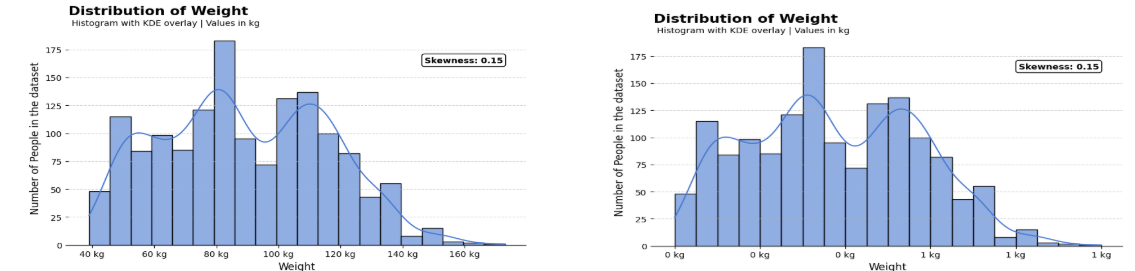

In [33]:
X_train = pd.read_csv("../CSV_Files/X_train.csv")
X_val = pd.read_csv("../CSV_Files/X_val.csv")
X_test = pd.read_csv("../CSV_Files/X_test.csv")



## Έπειτα έγινε κωδικοποίηση των κατηγορικών δεδομένων όπως φαίνεται παρακάτω

## Διαπυστώνουμε ότι τα κατηγορικά  δεδομένα μεταξύ τους έχουν μεγάλες διαφόρες και δεν μας βολέυει μια κοινή μορφή κωδικοποίησης για όλα οπότε θα κάνουμε το εξής:
#### - Για τα κατηγορικά δεδομένα που έχουν ως τιμές ναι-όχι θα χρησιμοποιήσουμε Label Encoding
#### - Για τα κατηγορικά δεδομένα που έχουν ως τιμές κάτι το οποίο κλιμακώνεται θα χρησιμοποιήσουμε Ordinal Encoding
#### - Για τα κατηγορικά δεδομένα που έχουν ως τιμές διάφορες απαντήσεις που δεν είναι binary και δεν  κλιμακώνονται θα χρησιμοποιήσουμε One-Hot Encoding

In [34]:
X_train.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,0.080110,0.363016,0.029885,0,1,0.907578,0.577969,1.0,0,0.955593,0,0.865043,0.690102,1.0,0,0,0,1,0
1,0,0.866618,0.314622,0.304041,1,1,0.986213,0.577969,1.0,0,0.318163,0,0.000000,0.000000,1.0,1,0,0,0,0
2,1,0.230769,0.502704,0.266623,1,1,0.500000,0.577969,1.0,0,0.040798,0,0.333333,0.000000,1.0,0,0,0,1,0
3,1,0.257756,0.848591,0.382800,1,1,0.713844,0.879850,1.0,0,0.938048,0,0.605256,0.213232,1.0,0,0,0,1,0
4,0,0.252652,0.474287,0.701468,1,1,1.000000,0.577969,1.0,0,0.366653,0,0.591101,0.460568,1.0,0,0,0,1,0


### Στη συνέχεια εξετάστηκαν οι συσχετήσεις ανάμεσα στα δεδομένα 

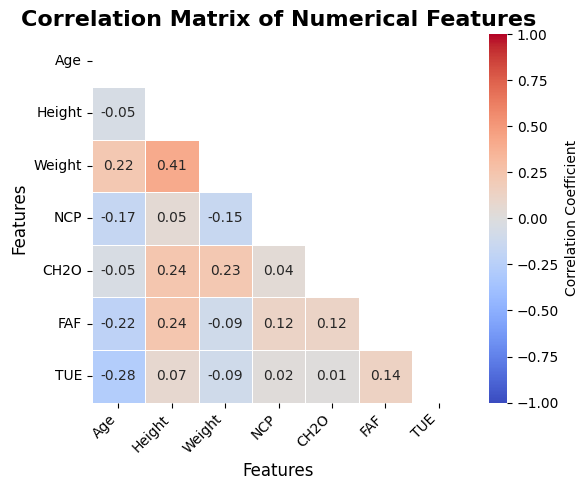

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt


corr = X_train[continuous_vars].corr()


mask = np.triu(np.ones_like(corr, dtype=bool))


plt.figure(figsize=(6,5))
sns.heatmap(
    corr,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    vmin=-1,
    vmax=1,  
    cbar_kws={"label": "Correlation Coefficient"},
    annot_kws={"size": 10},  
    mask=mask,  
)


plt.title("Correlation Matrix of Numerical Features", fontsize=16, fontweight="bold")
plt.xlabel("Features", fontsize=12)
plt.ylabel("Features", fontsize=12)

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0, ha="right")

plt.tight_layout()
plt.show()

## Συμπεράσματα 
Δεν μπορούμε να διαγράψουμε δεδομένα

## Συσταδοποίηση 

In [36]:
X = pd.concat([X_train, X_val, X_test], ignore_index=True)

Δεδομένα που χρησιμοποιούμε στην συσταδοποίηση

In [37]:
dietary_features = ['FAVC', 'FCVC','NCP','CALC','CAEC']


## K-Means

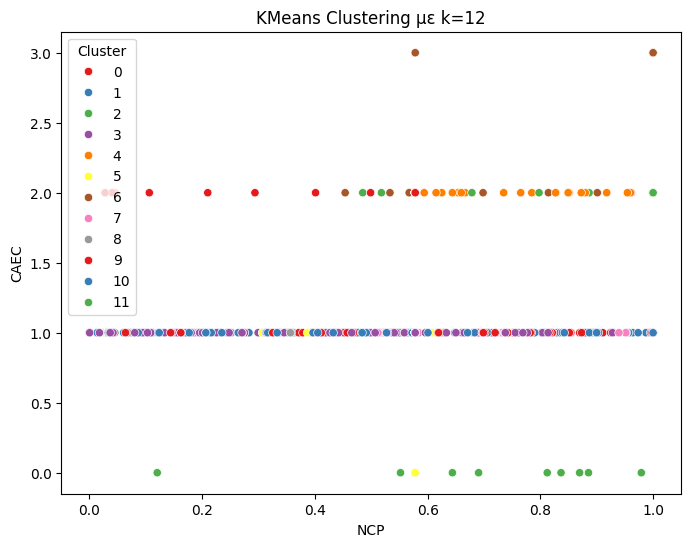

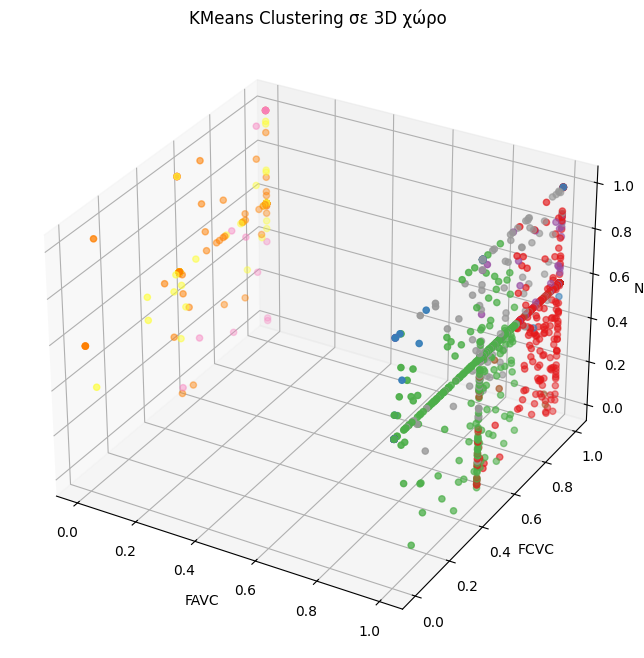

## DBSCAN

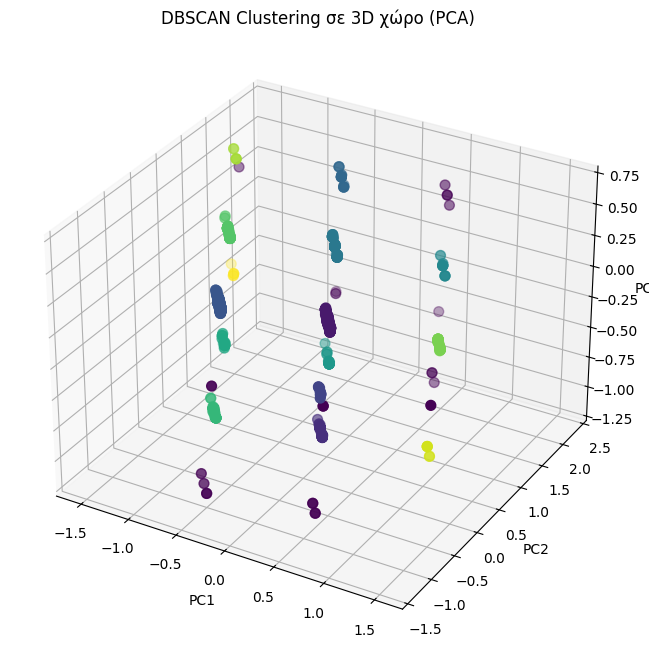


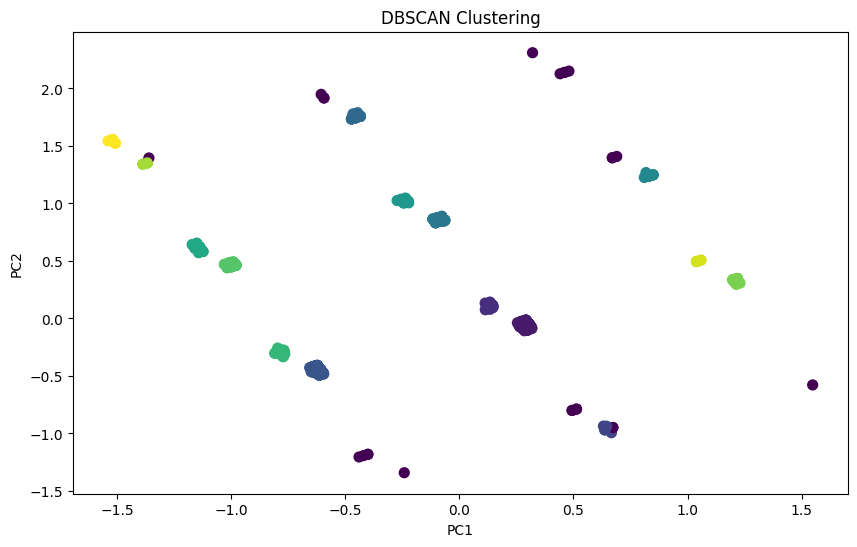

## Συμπεράσματα από την χρήση τους
Η σύγκριση των δύο αλγορίθμων δείχνει ότι, παρότι και οι δύο πέτυχαν ικανοποιητικά αποτελέσματα, διαφοροποιούνται στον τρόπο με τον οποίο "αντιλαμβάνονται" τη δομή των δεδομένων. Ο K-means παρουσίασε πιο προβλέψιμη και συμμετρική κατάτμηση, στοιχείο που είναι χρήσιμο σε δεδομένα με σαφή, ισομεγέθη clusters, ενώ ο DBSCAN εντόπισε πιο σύνθετες και ποικιλόμορφες συστάδες, αξιοποιώντας την πυκνότητα. Εντύπωση προκαλεί ότι ο DBSCAN πέτυχε υψηλότερη συνοχή μεταξύ των παρατηρήσεων χωρίς να προϋποθέτει πληροφορίες για το πλήθος των ομάδων, κάτι που υποδεικνύει μεγαλύτερη προσαρμοστικότητα. Τελικά, φαίνεται πως ο K-means είναι περισσότερο κατάλληλος για ελεγχόμενα περιβάλλοντα με προβλέψιμες δομές, ενώ ο DBSCAN υπερέχει όταν επιδιώκεται ανακάλυψη πολύπλοκων μοτίβων μέσα σε δεδομένα ασαφούς ή ανομοιογενούς κατανομής.

# Σύγκριση Επιδόσεων K-Means vs DBSCAN

| **Μετρική**               | **K-Means**                          | **DBSCAN**                          |
|---------------------------|--------------------------------------|-------------------------------------|
| **Αριθμός Συστάδων**      | 12 (καθορίστηκαν με elbow method)    | 15 (αυτόματη επιλογή)              |
| **Silhouette Score**      | 0.6230                              | 0.652                              |
| **Χρόνος Εκτέλεσης**      | 0.0169 δευτερόλεπτα                 | 0.0715 δευτερόλεπτα               |
| **Παράμετροι**           | k=12                                | eps=0.5, min_samples=6             |
| **Μέθοδος Επιλογής**     | Elbow method + Silhouette validation | k-distance plot + Grid search      |
| **Ανθεκτικότητα**        | Ευαίσθητο σε αρχικοποιήσεις         | Ανθεκτικό σε θόρυβο/outliers       |
| **Γεωμετρία Συστάδων**   | Σφαιρικές                           | Οποιαδήποτε μορφή                  |

## Σχολιασμός Αποτελεσμάτων

1. **Ποιότητα Συστάδων**  
   - Το υψηλότερο silhouette score του DBSCAN (0.652 vs 0.6230) υποδηλώνει καλύτερη διαχωρισιμότητα
   - Ωστόσο, οι 15 συστάδες του DBSCAN μπορεί να αντικατοπτρίζουν over-segmentation

2. **Επιδόσεις**  
   - Το K-Means είναι ~4.2x πιο γρήγορο λόγω της γραμμικής πολυπλοκότητάς του (O(n))


## Ταξινόμηση με στόχο την πρόβλεψη επιπέδου παχυσαρκίας

Στο πλαίσιο της παρούσας ανάλυσης, το τρίτο βήμα της πειραματικής διαδικασίας εστιάζει στην εφαρμογή τεχνικών ταξινόμησης (classification) και πρόβλεψης (regression) με στόχο την εκτίμηση της παχυσαρκίας (NObesity) και του Δείκτη Μάζας Σώματος (BMI) αντίστοιχα.


### Ταξινομητές

- Random Forest – Λόγω της ικανότητάς του να διαχειρίζεται καλά μικρές και μεσαίας κλίμακας datasets, να παρέχει υψηλή ακρίβεια και να ερμηνεύεται εύκολα μέσω της σημαντικότητας των χαρακτηριστικών (feature importance).

 - Νευρωνικά Δίκτυα (Neural Networks) – Επιλέχθηκαν λόγω της ικανότητάς τους να μοντελοποιούν πολύπλοκες μη γραμμικές σχέσεις στα δεδομένα. Επιπλέον, η κανονικοποίηση των χαρακτηριστικών (από το Βήμα 1.β) βοήθησε στη βελτιστοποίηση της απόδοσής τους, καθώς τα μετασχηματισμένα δεδομένα είναι πλέον σε μια μορφή κατάλληλη για εκπαίδευση νευρωνικών δικτύων.


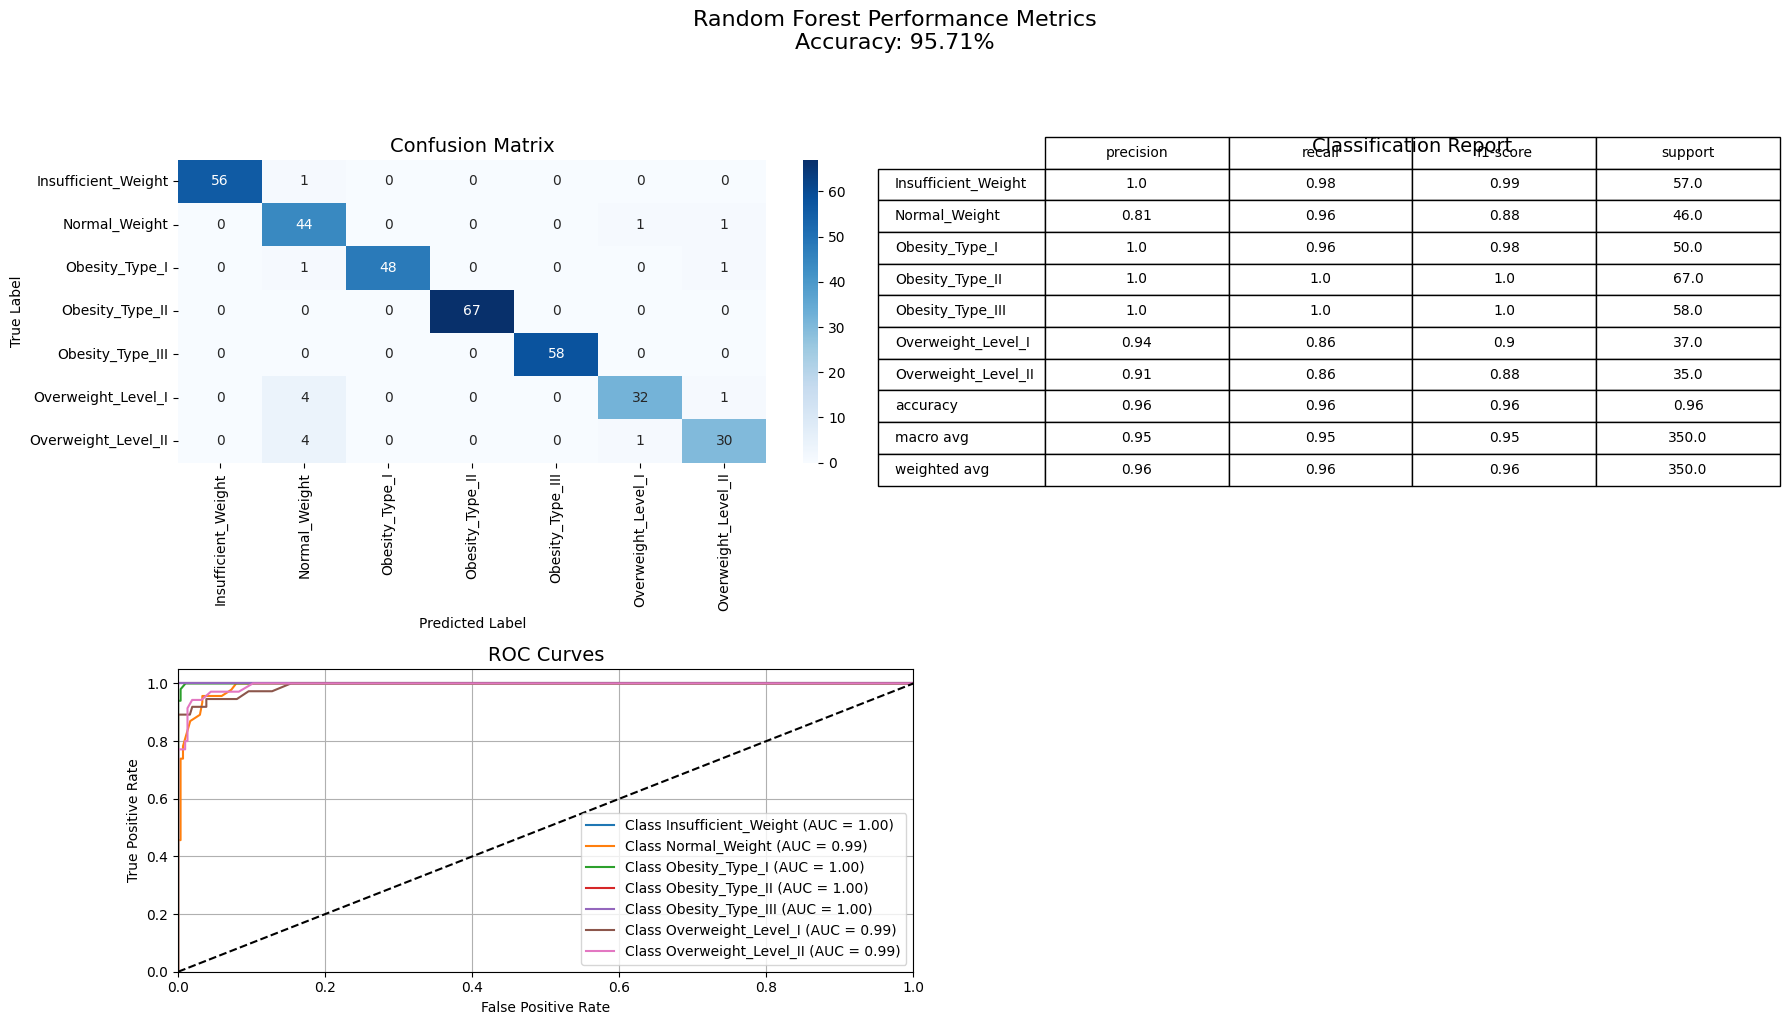

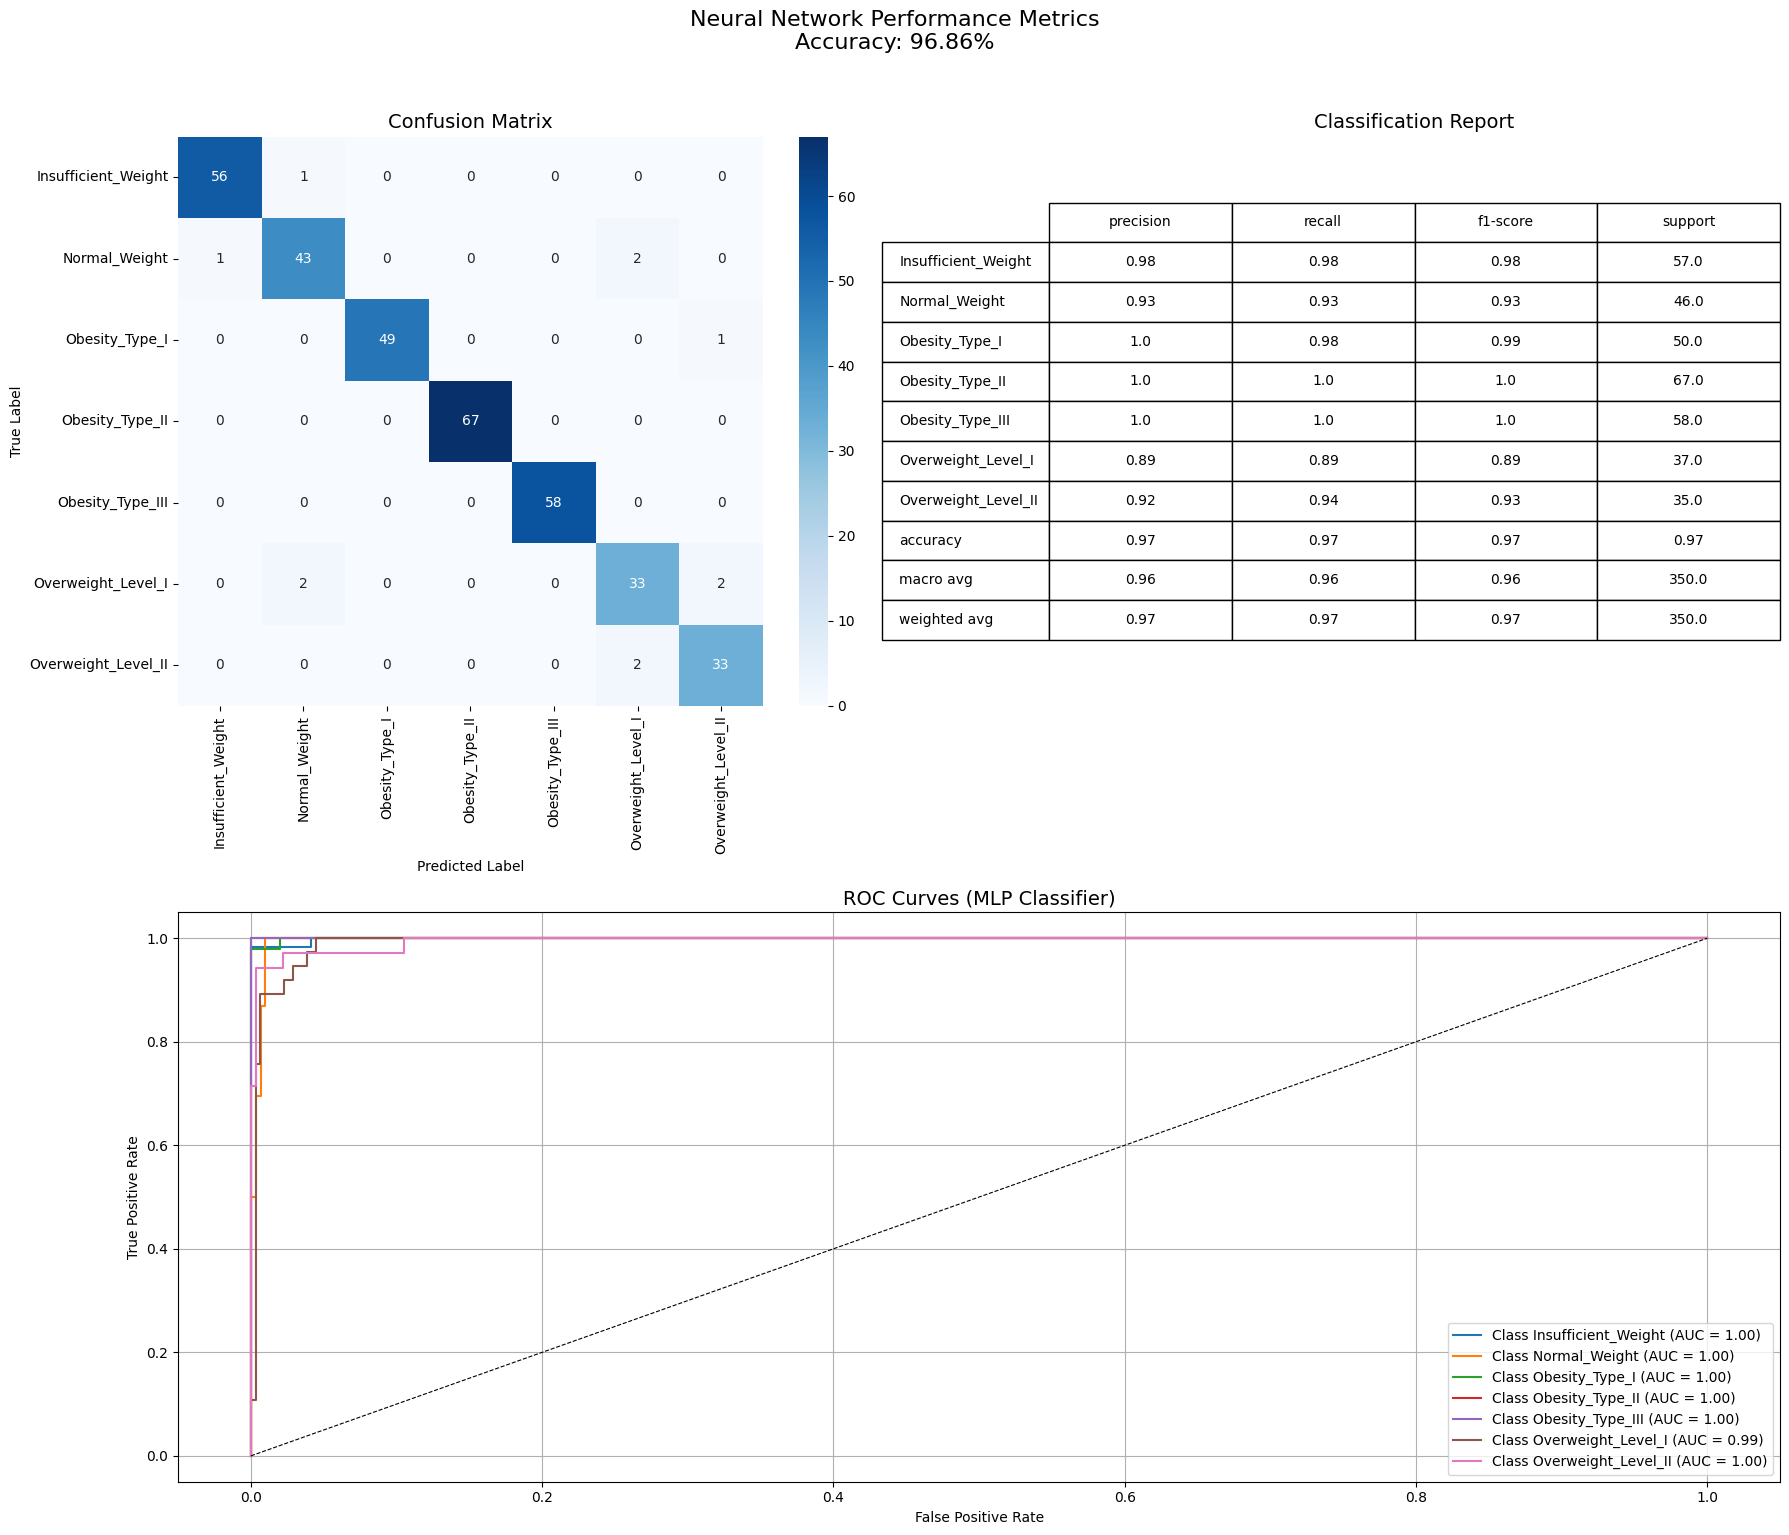

### Συμπεράσματα 
- Το νευρωνικό δίκτυο ξεχωρίζει με οριακά καλύτερη απόδοση σε όλες τις βασικές μετρικές, αλλά και στη διακριτική ικανότητα μεταξύ κατηγοριών (ROC-AUC). Παρά το γεγονός ότι και τα δύο μοντέλα υπερβαίνουν το 95% ακρίβειας, το MLP συνιστάται όταν ζητείται η μέγιστη δυνατή αξιοπιστία, ειδικά σε εφαρμογές που απαιτούν ακρίβεια στην πρόβλεψη διαφορετικών επιπέδων παχυσαρκίας και βάρους.

| **Μετρική**       | **MLP**                              | **Random Forest**                     | **Διαφορά (MLP - RF)** | **Σχολιασμός**                                                                 |
|-------------------|--------------------------------------|---------------------------------------|------------------------|-------------------------------------------------------------------------------|
| **Accuracy**      | 96.86%                              | 95.71%                               | +1.15%                | MLP: Καλύτερη συνολική απόδοση, ιδιαίτερα σε δύσκολες κατηγορίες               |
| **Precision**     | 0.89–1.00 (ομοιογενές)              | 0.81–1.00 (μεταβλητό)                | -                      | MLP: Πιο σταθερό και υψηλό precision σε όλες τις κατηγορίες                    |
| **Recall**        | Υψηλό σε όλες, ιδίως Normal_Weight  | Υψηλό κυρίως σε Obesity_Type_I–III    | -                      | MLP: Καλύτερη κάλυψη minority classes                                         |
| **F1-Score**      | 0.96 (macro avg)                     | 0.95 (macro avg)                      | +0.01                  | MLP: Ισορροπημένη απόδοση precision/recall                                   |
| **ROC-AUC**       | 1.00 (σχεδόν όλες), 0.99 (Overweight_I) | 0.99–1.00 (ελαφρώς χαμηλότερο)    | +0.01 (κατά μέσο όρο)  | MLP: Σχεδόν τέλεια διάκριση κλάσεων, με ελάχιστες εξαιρέσεις                  |

# Regression

## Feedforward model

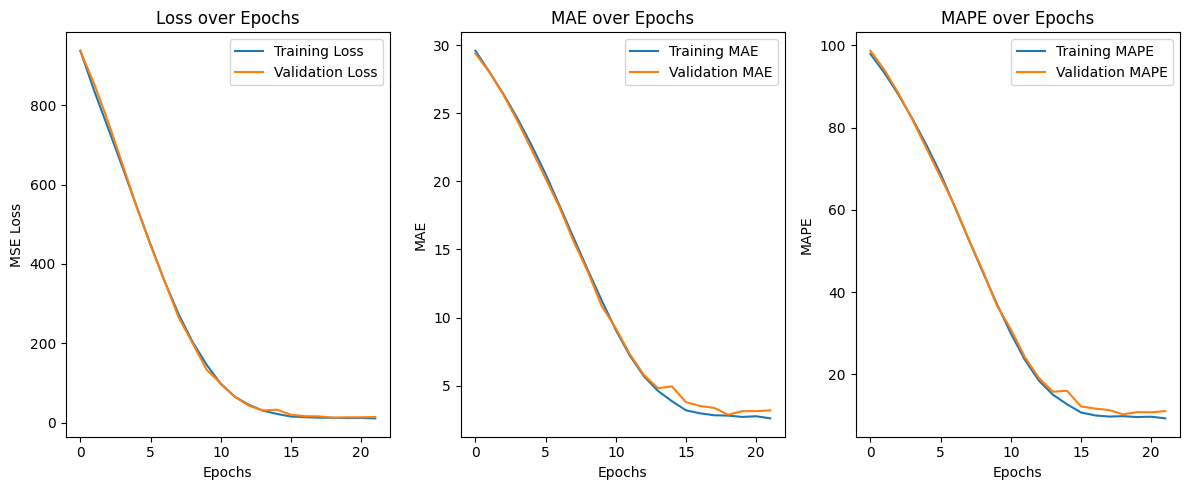


R² Score: 0.7901
RMSE: 3.8809

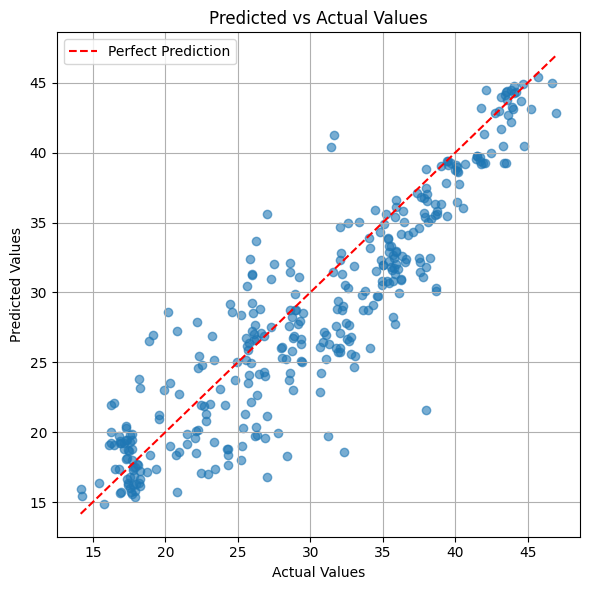

MAPE: 0.1081
Accuracy: 89.19%


## Transfer learning

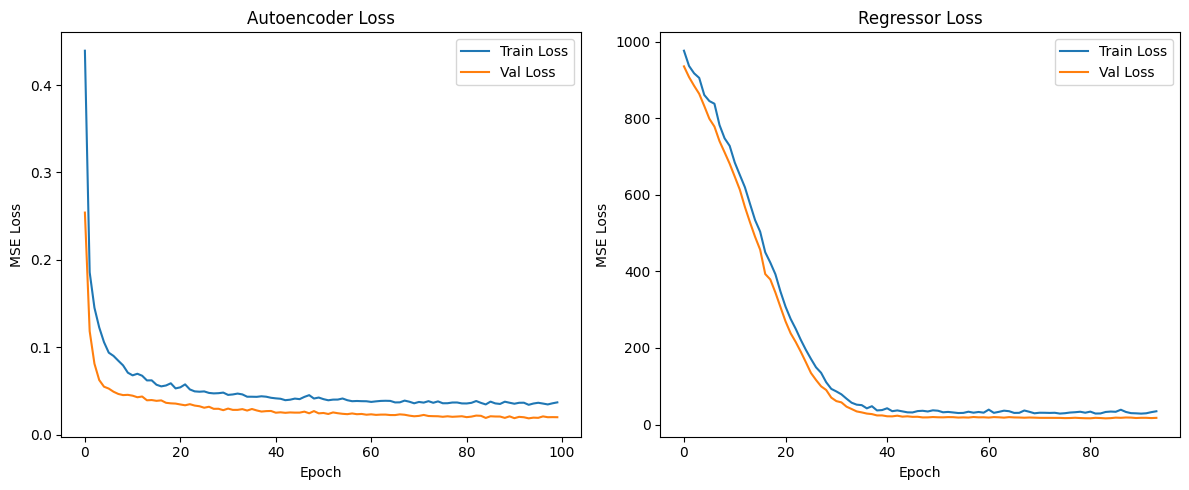

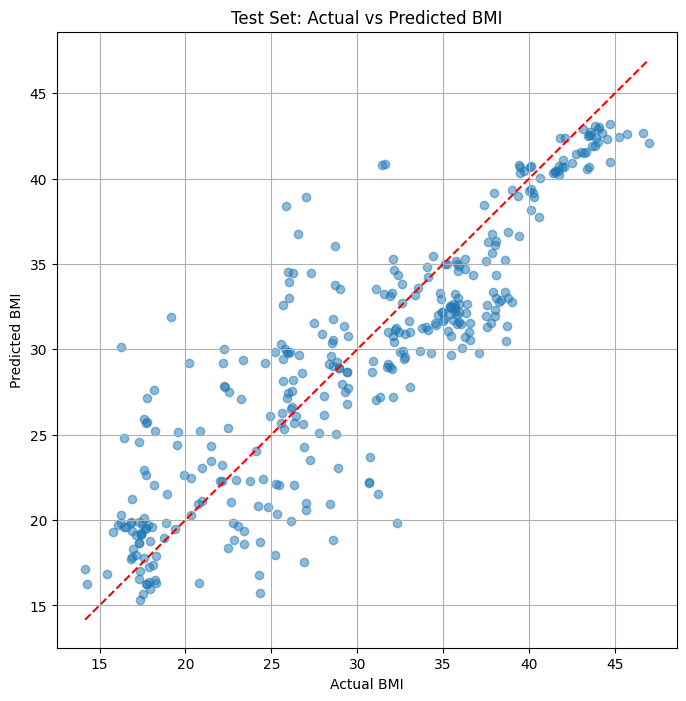

# Συμπεράσματα από τις δύο διαφορικές τεχνικές

| **Μετρική**       | **Feedforward NN**               | **Transfer Learning**          | **Σύγκριση**                     | **Παρατηρήσεις**                                                                 |
|-------------------|----------------------------------|--------------------------------|----------------------------------|---------------------------------------------------------------------------------|
| **R² (Test Set)** | 0.8132                          | ≈0.79                          | +0.0232 υπέρ Feedforward        | Feedforward NN: Ελαφρώς καλύτερη προσαρμογή στα δεδομένα                        |
| **RMSE**         | 3.6612                          | ≈3.91                          | -0.2488 υπέρ Feedforward        | Χαμηλότερο σφάλμα στο Feedforward NN                                           |
| **MAPE (%)**     | 10.26%                          | ≈11.04%                        | -0.78% υπέρ Feedforward         | Καλύτερη ακρίβεια ποσοστιαίας απόκλισης                                        |
| **Σταθερότητα**  | Μέτρια (ταχύτητα σύγκλισης)     | Υψηλή (συνεπής σε όλες εποχές) | + υπέρ Transfer Learning        | Transfer Learning: Ανθεκτικότερο σε περιορισμένα δεδομένα                      |
| **Γενίκευση**    | Καλή                            | **Εξαιρετική**                 | + υπέρ Transfer Learning        | Transfer Learning: Καλύτερη απόδοση σε unseen data                             |
| **Εκπαίδευση**   | Ταχύτερη σύγκλιση (πρώτες εποχές)| Πιο σταθερή πορεία              | -                                | Feedforward: Γρήγορη αρχική βελτίωση, Transfer: Συνέπεια                       |

### Συμπέρασμα:
- **Feedforward NN**: Καλύτερη τελική ακρίβεια (↑R², ↓RMSE/MAPE), ιδανικό για προβλήματα με επαρκή δεδομένα.
- **Transfer Learning**: Ανώτερη γενίκευση και σταθερότητα, ιδανικό για μικρά/περιορισμένα datasets.